In [28]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [29]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [30]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [31]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [32]:
# reflect an existing database into a new model and get table information
inspect = inspect(engine)
inspect.get_table_names()

['measurement', 'station']

In [33]:
# reflect the table information for measurement.csv
columns_measurement = inspect.get_columns('measurement')
for column in columns_measurement:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [34]:
# reflect the table information for station.csv
columns_station = inspect.get_columns('station')
for column in columns_station:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [35]:
# View all of the classes that automap found
Base = automap_base()
Base.prepare(autoload_with=engine)
Base.classes.keys()

['measurement', 'station']

In [36]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [37]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [38]:
# Find the most recent date in the data set.
session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23',)

In [39]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Print "last date"
last_date = session.query(measurement.date).order_by(measurement.date.desc()).first().date
print(last_date)

# Calculate the date one year from the last date in data set
# Print "one year from last date"
last_year = dt.datetime.strptime(last_date, '%Y-%m-%d') - dt.timedelta(days=365)
print(last_year)

# Perform a query to retrieve the data and precipitation scores
rain_results = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date >= last_year).\
    order_by(measurement.date).all()

# View Query results (check for presence of null rows)
rain_results

2017-08-23
2016-08-23 00:00:00


[('2016-08-24', 2.0),
 ('2016-08-24', 54.6),
 ('2016-08-24', 57.9),
 ('2016-08-24', None),
 ('2016-08-24', 31.0),
 ('2016-08-24', 54.6),
 ('2016-08-24', 36.8),
 ('2016-08-25', 2.0),
 ('2016-08-25', 2.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 5.3),
 ('2016-08-25', 1.5),
 ('2016-08-25', 2.8),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.8),
 ('2016-08-26', 0.5),
 ('2016-08-26', 1.0),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.3),
 ('2016-08-27', 0.0),
 ('2016-08-27', 4.6),
 ('2016-08-27', 0.5),
 ('2016-08-27', 0.0),
 ('2016-08-27', 3.0),
 ('2016-08-27', None),
 ('2016-08-28', 0.3),
 ('2016-08-28', 3.6),
 ('2016-08-28', 3.6),
 ('2016-08-28', 3.6),
 ('2016-08-28', 15.2),
 ('2016-08-28', 52.6),
 ('2016-08-29', 0.0),
 ('2016-08-29', 4.3),
 ('2016-08-29', 1.0),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),
 ('2016-08-29', 8.9),
 ('2016-08-29', 22.9),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.5),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-30', 1.3),

In [40]:
# Store query results in dataframe, set_index for "date" column, and drop null values
precipitation_df = pd.DataFrame(rain_results, columns = ["date", "precipitation"])
precipitation_df.set_index('date', inplace=True)
precipitation_df.head()
precipitation_df.dropna().reset_index()

,date,precipitation
0,2016-08-24,2.0
1,2016-08-24,54.6
2,2016-08-24,57.9
3,2016-08-24,31.0
4,2016-08-24,54.6
...,...,...
2010,2017-08-22,12.7
2011,2017-08-23,0.0
2012,2017-08-23,0.0
2013,2017-08-23,2.0


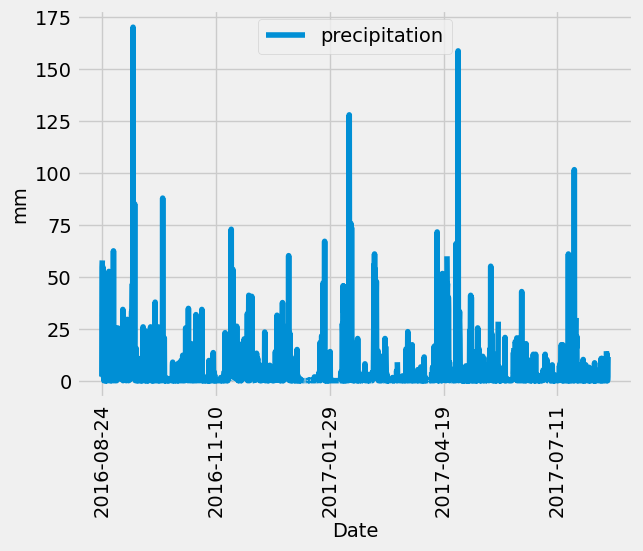

In [41]:
# Use Pandas Plotting with Matplotlib to plot the data
precipitation_df.plot().get_figure()

plt.xlabel("Date")
plt.ylabel("mm")
plt.xticks(rotation = 'vertical')
plt.show()

In [42]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipitation_df.describe()

,precipitation
count,2015.000000
mean,4.485112
std,11.690532
min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
max,170.200000


# Exploratory Station Analysis

In [43]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(station.station)).all()

[(9,)]

In [44]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(measurement.station,func.count(measurement.station)).group_by(measurement.station)\
    .order_by(func.count(measurement.station).desc()).all()


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [45]:
# query to find the most active station (most rows), and list in descending order.
# Take the first station reading and store in variable
ddd = session.query(measurement.station,func.count(measurement.station)).group_by(measurement.station)\
    .order_by(func.count(measurement.station).desc()).first()

most_active = ddd[0]
most_active

'USC00519281'

In [46]:
# Using the most active station id from the previous query, calculate the lowest (func.min), highest (func.max), and average temperature (func.avg).
# Most active station based on above query is USC00519281. 
session.query(func.min(measurement.tobs),func.max(measurement.tobs),func.avg(measurement.tobs))\
    .filter(measurement.station==most_active).all()

[(12.2, 29.4, 22.03582251082252)]

<function matplotlib.pyplot.show(close=None, block=None)>

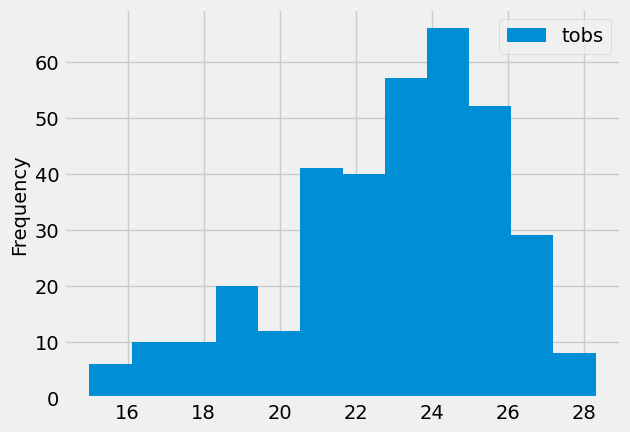

In [47]:
# Using the most active station id - USC00519281
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
# Use "last year" variable to get all results from last 12 months from last date
active_results = session.query(measurement.tobs).filter(measurement.station==most_active)\
    .filter(measurement.date >= last_year).all()

active_results_df=pd.DataFrame(active_results, columns=['tobs'])
active_results_df.plot.hist(bins=12)
plt.show

# Close Session

In [48]:
# Close Session
session.close()